In [1]:
from importlib import reload
import specsanalyzer
from specsanalyzer import SpecsAnalyzer
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np




In [2]:
reload(specsanalyzer)
spa = SpecsAnalyzer()

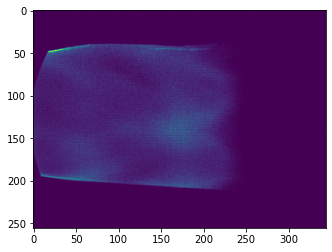

In [3]:
with open('../tests/data/dataEPFL/9159/AVG/000.tsv') as file:
#with open('../tests/data/dataFHI/Scan1232.tsv') as file:
    tsv_data = np.loadtxt(file, delimiter='\t')
plt.figure()
plt.imshow(tsv_data)

In [4]:
# Testing convert and crop on the imported data
spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")

lens_mode="WideAngleMode"
kinetic_energy=35.5
pass_energy=25

res_xarray = spa.convert_image(tsv_data, pass_energy, kinetic_energy, lens_mode)
plt.figure()
res_xarray.plot()

New correction matrix
closest_rr_index=  13
rr_factor=  0.5039999999999996
106.3847555751729
25 [0.00321] 4.54 0.00645 4
x_bins-shape (256,)
y_bins-shape (344,)
image-shape (256, 344)
UCgrid  ((0.0, 255.0, 256), (0.0, 343.0, 343))


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<function _eval_linear at 0x000001CA3999F1F0>) found for signature:
 
 >>> _eval_linear(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2))
 
There are 8 candidate implementations:
[1m  - Of which 1 did not match due to:
  Overload in function '__eval_linear': File: C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py: Line 178.
    With argument(s): '(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2))':[0m
[1m   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   [1m[1m[1m[1m[1m[1m[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
   [1m[1m[1mNo implementation of function Function(<function _eval_spline at 0x000001CA39946790>) found for signature:
    
    >>> _eval_spline(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2), out=none, order=Literal[int](1), diff=Literal[str](None), extrap_mode=Literal[str](linear))
    
   There are 2 candidate implementations:
   [1m  - Of which 1 did not match due to:
     Overload in function '__eval_spline': File: C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py: Line 97.
       With argument(s): '(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2), out=none, order=int64, diff=unicode_type, extrap_mode=unicode_type)':[0m
   [1m   Rejected as the implementation raised a specific error:
        AttributeError: 'Integer' object has no attribute 'literal_value'[0m
     raised from C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py:116
   [1m  - Of which 1 did not match due to:
     Overload in function '__eval_spline': File: C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py: Line 97.
       With argument(s): '(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2), out=none, order=Literal[int](1), diff=Literal[str](None), extrap_mode=Literal[str](linear))':[0m
   [1m   Rejected as the implementation raised a specific error:
        TypingError: Failed in nopython mode pipeline (step: nopython frontend)
      [1m[1m[1mNo implementation of function Function(<class 'int'>) found for signature:
       
       >>> int(array(float64, 1d, C))
       
      There are 2 candidate implementations:
      [1m      - Of which 2 did not match due to:
            Overload of function 'int': File: numba\core\typing\builtins.py: Line 953.
              With argument(s): '(array(float64, 1d, C))':[0m
      [1m       No match.[0m
      [0m
      [0m[1mDuring: resolving callee type: Function(<class 'int'>)[0m
      [0m[1mDuring: typing of call at <string> (24)
      [0m
      [1m
      File "<string>", line 24:[0m
      [1m<source missing, REPL/exec in use?>[0m
   [0m
     raised from c:\ProgramData\Anaconda3\lib\site-packages\numba\core\typeinfer.py:1086
   [0m
   [0m[1mDuring: resolving callee type: Function(<function _eval_spline at 0x000001CA39946790>)[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (163)
   [0m
   [1m
   File "..\..\..\..\..\..\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py", line 163:[0m
   [1mdef eval_spline(grid, C, points, out=None, order=1, diff="None", extrap_mode="linear"):
       <source elided>
       extrap_ = numba.literally(extrap_mode)
   [1m    return _eval_spline(grid, C, points, out=out, order=k, diff=dd, extrap_mode=extrap_)
   [0m    [1m^[0m[0m
   
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [1m
   File "..\..\..\..\..\..\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py", line 181:[0m
   [1mdef __eval_linear(grid, C, points):
       <source elided>
       # print("We allocate with default extrapolation.")
   [1m    return lambda grid, C, points: eval_spline(
   [0m    [1m^[0m[0m
[0m
  raised from c:\ProgramData\Anaconda3\lib\site-packages\numba\core\typeinfer.py:1086
[1m  - Of which 1 did not match due to:
  Overload in function '__eval_linear': File: C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py: Line 178.
    With argument(s): '(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2))':[0m
[1m   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   [1m[1m[1m[1m[1m[1m[1m[1m[1m[1m[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
   [1m[1m[1mNo implementation of function Function(<function _eval_spline at 0x000001CA39946790>) found for signature:
    
    >>> _eval_spline(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2), out=none, order=Literal[int](1), diff=Literal[str](None), extrap_mode=Literal[str](linear))
    
   There are 2 candidate implementations:
   [1m  - Of which 1 did not match due to:
     Overload in function '__eval_spline': File: C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py: Line 97.
       With argument(s): '(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2), out=none, order=int64, diff=unicode_type, extrap_mode=unicode_type)':[0m
   [1m   Rejected as the implementation raised a specific error:
        AttributeError: 'Integer' object has no attribute 'literal_value'[0m
     raised from C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py:116
   [1m  - Of which 1 did not match due to:
     Overload in function '__eval_spline': File: C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py: Line 97.
       With argument(s): '(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2), out=none, order=Literal[int](1), diff=Literal[str](None), extrap_mode=Literal[str](linear))':[0m
   [1m   Rejected as the implementation raised a specific error:
        TypingError: Failed in nopython mode pipeline (step: nopython frontend)
      [1m[1m[1mNo implementation of function Function(<class 'int'>) found for signature:
       
       >>> int(array(float64, 1d, C))
       
      There are 2 candidate implementations:
      [1m      - Of which 2 did not match due to:
            Overload of function 'int': File: numba\core\typing\builtins.py: Line 953.
              With argument(s): '(array(float64, 1d, C))':[0m
      [1m       No match.[0m
      [0m
      [0m[1mDuring: resolving callee type: Function(<class 'int'>)[0m
      [0m[1mDuring: typing of call at <string> (24)
      [0m
      [1m
      File "<string>", line 24:[0m
      [1m<source missing, REPL/exec in use?>[0m
   [0m
     raised from c:\ProgramData\Anaconda3\lib\site-packages\numba\core\typeinfer.py:1086
   [0m
   [0m[1mDuring: resolving callee type: Function(<function _eval_spline at 0x000001CA39946790>)[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (163)
   [0m
   [1m
   File "..\..\..\..\..\..\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py", line 163:[0m
   [1mdef eval_spline(grid, C, points, out=None, order=1, diff="None", extrap_mode="linear"):
       <source elided>
       extrap_ = numba.literally(extrap_mode)
   [1m    return _eval_spline(grid, C, points, out=out, order=k, diff=dd, extrap_mode=extrap_)
   [0m    [1m^[0m[0m
   
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [0m[1mDuring: resolving callee type: type(CPUDispatcher(<function eval_spline at 0x000001CA3999F0D0>))[0m
   [0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (181)
   [0m
   [1m
   File "..\..\..\..\..\..\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py", line 181:[0m
   [1mdef __eval_linear(grid, C, points):
       <source elided>
       # print("We allocate with default extrapolation.")
   [1m    return lambda grid, C, points: eval_spline(
   [0m    [1m^[0m[0m
[0m
  raised from c:\ProgramData\Anaconda3\lib\site-packages\numba\core\typeinfer.py:1086
[1m  - Of which 2 did not match due to:
  Overload in function '__eval_linear': File: C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py: Line 186.
    With argument(s): '(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2))':[0m
[1m   Rejected as the implementation raised a specific error:
     TypingError: [1mmissing a required argument: 'extrap_mode'[0m[0m
  raised from c:\ProgramData\Anaconda3\lib\site-packages\numba\core\typing\templates.py:791
[1m  - Of which 4 did not match due to:
  Overload in function '__eval_linear': File: C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py: Line 204.
    With argument(s): '(UniTuple(Tuple(float64, float64, int64) x 2), array(float64, 2d, C), UniTuple(array(float64, 1d, C) x 2))':[0m
[1m   Rejected as the implementation raised a specific error:
     TypingError: [1mmissing a required argument: 'out'[0m[0m
  raised from c:\ProgramData\Anaconda3\lib\site-packages\numba\core\typing\templates.py:791
[0m
[0m[1mDuring: resolving callee type: Function(<function _eval_linear at 0x000001CA3999F1F0>)[0m
[0m[1mDuring: typing of call at C:\Users\Michele\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py (232)
[0m
[1m
File "..\..\..\..\..\..\AppData\Roaming\Python\Python39\site-packages\interpolation\splines\eval_splines.py", line 232:[0m
[1mdef eval_linear(*args):
    <source elided>
    """Do I get a docstring ?"""
[1m    return _eval_linear(*args)
[0m    [1m^[0m[0m


In [ ]:
with open('../tests/data/dataEPFL/igor_R9159/data_delay0.tsv') as file:
#with open('../tests/data/dataFHI/Scan1232_converted.tsv') as file:
    ref_data = np.loadtxt(file, delimiter='\t')
    ref_data = ref_data
    #ref_data = ref_data.T
#angle_axis = np.linspace(-18, 17.3077, ref_data.shape[0])
#angle_axis = np.linspace(-18, 17.3077, ref_data.shape[0])

#ek_axis = np.linspace(15.86, 21.1247, ref_data.shape[1])
#ek_axis = np.linspace(33.85, 37.1404, ref_data.shape[1])


import specsanalyzer.convert
reload(specsanalyzer.convert)   
#let's get all the functions to be tested
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm
from specsanalyzer.convert import calculate_matrix_correction

spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict=spa.return_config()
lens_mode="WideAngleMode"
kinetic_energy=35.5
pass_energy=25
binning=4

(ek_axis,
    angle_axis,
    angular_correction_matrix,
    e_correction,
    jacobian_determinant,
) = calculate_matrix_correction(
    lens_mode,
    pass_energy,
    kinetic_energy,
    binning,
    config_dict,
)


ref_xarray = xr.DataArray(
    data=ref_data,
    coords={"Angle": angle_axis, "Ekin": ek_axis},
    dims=["Angle", "Ekin"],
)
plt.figure()
ref_xarray.plot()

In [ ]:
#ref_xarray_reint=ref_xarray.interp_like(res_xarray)
#ff_xarray = (res_xarray - ref_xarray_reint)/
ff_xarray = (res_xarray - ref_xarray)
ff_xarray

In [ ]:
plt.figure()
ff_xarray.plot(cmap='RdBu_r',vmax=3000 )

In [ ]:
from turtle import title


fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(4, 8))
subplot1=ref_xarray.plot(ax=ax1 )
subplot2=res_xarray.plot(ax=ax2, vmin=0 )
subplot3=ff_xarray.plot(cmap='RdBu_r',ax=ax3 )

plt.tight_layout()



In [ ]:
res_xarray

In [ ]:
ref_xarray

In [ ]:
print(angle_axis[0],angle_axis[angle_axis.size-1])

In [ ]:
from scipy import interpolate

x = np.arange(-5.01, 5.01, 0.25)

y = np.arange(-5.01, 5.01, 0.3)

xx, yy = np.meshgrid(x, y)

z = np.sin(xx**2+yy**2)

f = interpolate.interp2d(x, y, z, kind='cubic')

In [ ]:
import matplotlib.pyplot as plt

xnew = np.arange(-5.01, 5.01, 1e-2)

ynew = np.arange(-5.01, 5.01, 2e-2)

znew = f(xnew, ynew)

plt.contourf(xnew, ynew, znew)

plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Regularly-spaced, coarse grid
dx, dy = 0.4, 0.4
xmax, ymax = 2, 4
x = np.arange(-xmax, xmax, dx)
y = np.arange(-ymax, ymax, dy)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(2*X)**2 - (Y/2)**2)

interp_spline = RectBivariateSpline(y, x, Z)

# Regularly-spaced, fine grid
dx2, dy2 = 0.16, 0.16
x2 = np.arange(-xmax, xmax, dx2)
y2 = np.arange(-ymax, ymax, dy2)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = interp_spline(y2, x2)

fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': '3d'})
ax[0].plot_wireframe(X, Y, Z, color='k')

ax[1].plot_wireframe(X2, Y2, Z2, color='k')
for axes in ax:
    axes.set_zlim(-0.2,1)
    axes.set_axis_off()

fig.tight_layout()
plt.show()


In [ ]:
from audioop import minmax
from interpolation.splines import eval_linear
from interpolation.splines import UCGrid, CGrid, nodes

minx=0.0
maxx=344.0
steps=345
grid = UCGrid((minx, maxx, steps), (-1.0, 1.0, 10))
grid